<a href="https://colab.research.google.com/github/mithunkumarsr/NLPNov21/blob/main/QA_Factoid_Google_Wiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

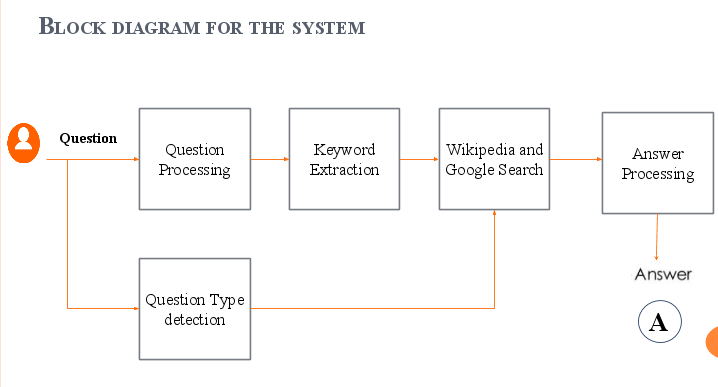

In [5]:
!pip install wikipedia 
!pip install wolframalpha

import unicodedata
import wolframalpha
from nltk import word_tokenize, pos_tag, ne_chunk, conlltags2tree, tree2conlltags
from googlesearch import search
import wikipedia
import collections

  Using cached wolframalpha-5.0.0-py3-none-any.whl (7.5 kB)


In [6]:
# Determine the type of question i.e location, date, person ,definiton
def classify_question(question):
    q = question.lower().split()
    if q[0] == 'where':
        return 'Location'
    elif 'year'  in question:
            return 'Date'
    elif 'country' in question:
        return 'Country'
    elif q[0] == 'who':
        return 'Person'
    elif q[0] == 'what':
        return 'Definition'
    else:

        return 'None'

In [7]:

def wiki_search(question):
    l = question.split(' ')
    if len(l) > 2:
        ques = " ".join(l[2:])
    try:
        print('inside wiki search')
        ans = (wikipedia.summary(question, sentences=1)).encode('ascii', 'ignore')
        link = wikipedia.page(ques)
        ans = str(ans) + '\n For more information: '+str(link.url)
    except:
        print ('wiki_search_failed_google')
        google_search(question)
    return ans

In [12]:
question = "What is the capital of India"
print(question)
answer = wiki_search(question)
print('answer: ',answer)

What is the capital of India
inside wiki search
answer:  b"Capital punishment in India is a legal penalty for some crimes under the country's main substantive penal legislation, the Indian Penal Code, as well as other laws."
 For more information: https://en.wikipedia.org/wiki/National_Capital_Region_(India)


In [9]:
question_type = classify_question(question)
print(question_type)

Location


Using Google API

In [10]:
def google_search(question):
    first_page = search(question,1)
    first_page = list(first_page)
    #print first_page
    top_three_result = []
    i = 0
    while i<5:
        top_three_result.append(first_page[i].description)
        i+=1

    first_search = ''.join(top_three_result).encode('ascii','replace')

    ne_tree = (ne_chunk(pos_tag(word_tokenize(first_search))))

    iob_tagged = tree2conlltags(ne_tree)

    ss = [tuple(map(str,eachTuple)) for eachTuple in iob_tagged]
    question_type = classify_question(question)
    print('question_type: ',question_type)
    if question_type == 'None':
        ans = "Oops! I don't know."
    else:
        google_answer = []
        if question_type == 'Person':
            for i in range(len(ss)):
                if ss[i][2] == 'B-PERSON'or ss[i][2] == 'I-PERSON':
                    google_answer.append(ss[i][0])
        elif question_type == 'Country':
            print('country identified')
            for i in range(len(ss)):
                if ss[i][2] == 'B-GPE'or ss[i][2] == 'I-GPE':
                    google_answer.append(ss[i][0])
        elif question_type == 'Location':
            for i in range(len(ss)):
                if ss[i][2] == 'B-LOCATION'or ss[i][2] == 'I-LOCATION':
                    google_answer.append(ss[i][0])
        elif question_type == 'Date':
            for i in range(len(ss)):
                if ss[i][2] == 'B-DATE'or ss[i][2] == 'I-DATE':
                    google_answer.append(ss[i][0])
        print('google: ',google_answer)
        if not google_answer:
            ans = "Oops, I don't know! "
        else:
            print('inside else')
            counts = collections.Counter(google_answer)
            print('counts: ',counts)
            t = counts.most_common(4)
            candidate_answer =  [ seq[0] for seq in t ]
            print(candidate_answer)
            for i in range(len(candidate_answer)):
                candidate_answer[i] = 'Candidate Answer '+ str(i+1)+' '+ candidate_answer[i]
            candidate_answer = '\n'.join(candidate_answer)
            ans = candidate_answer

    return ans

In [ ]:
question = "Why is the sky blue"
print(question)
answer = google_search(question)
print('answer: ',answer)